In [358]:
%matplotlib inline

# Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import  linear_model
import seaborn as sns


import math
np.set_printoptions(precision=3)
plt.rcParams.update({'font.size': 22})
path_X = "../Project2/action.csv"
oX = pd.read_csv(path_X)
path_Y = "../Project2/alert.csv"
oY = pd.read_csv(path_Y)

X = oX.copy()
Y = oY.copy()



                             alert                                     \
                             count          mean          std     min   
attack                                                                  
Continue                    5379.0   2353.432051   487.636414   560.0   
DVWA SQL Injection Exploit  1652.0   2564.038741   880.431358   429.0   
Install tools               3060.0   2718.303922  1159.799688   865.0   
Network service login       3378.0   2346.894020   486.631203   845.0   
Ping Scan                   4572.0  11523.121391  3155.315470  1076.0   
Sambacry Explolit           1959.0   2919.412966  1157.146100   938.0   

                                                                 
                                25%      50%       75%      max  
attack                                                           
Continue                    2017.00   2327.0   2670.00   4509.0  
DVWA SQL Injection Exploit  2028.00   2380.5   2801.75   7121.0  
Install tool

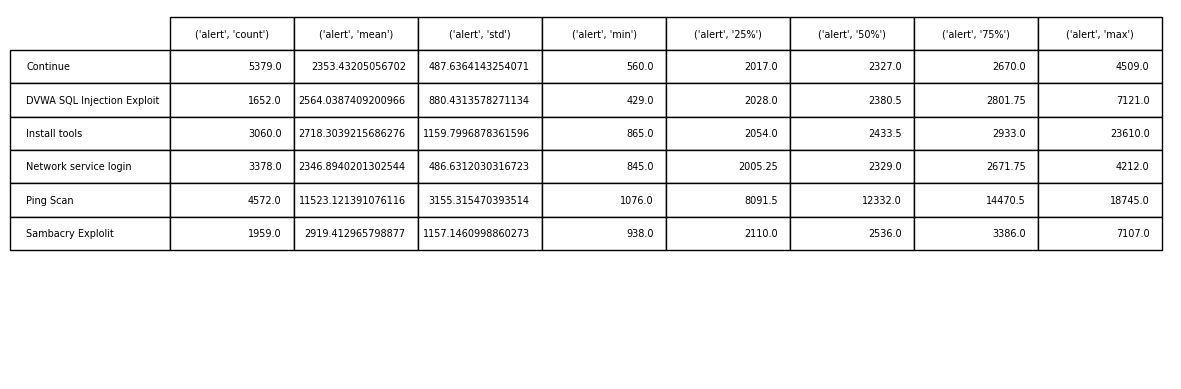

In [359]:
from pandas.plotting import table
df = pd.DataFrame(columns=['attack','alert',"timestep"])
count = 0
rows_list = []
unique_values = set()
for index, row in X.iterrows():
    
    for col, value in row.items():
        rows_list.append({"attack": value,"alert":Y.iloc[index][col],"timestep":col})
        unique_values.add(Y.iloc[index][col])
        
df = pd.DataFrame(rows_list)  
ps = df[df["attack"]== "Ping Scan"]
con = df[df["attack"]== "Continue"]
dwa = df[df["attack"]== "DVWA SQL Injection Exploit"]
it = df[df["attack"]== "Install tools"]
net = df[df["attack"]== "Network service login"]
sam = df[df["attack"]== "Sambacry Explolit"]
print(df.groupby("attack").describe())
desc = df.groupby("attack").describe()
#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
t = table(plot, desc,loc='upper right')
t.auto_set_font_size(False)
t.set_fontsize(7)
t.scale(2, 2)


#save the plot as a png file
plt.savefig('desc_plot.pdf',bbox_inches="tight")
tmpdf = pd.concat([it,ps,sam], ignore_index=True)


<bound method NDFrame._add_numeric_operations.<locals>.max of 6        2558
18       2958
27       1969
46       1948
56       2433
         ... 
19956    3140
19968    1832
19978    2855
19987    2275
19997    2269
Name: alert, Length: 1652, dtype: int64>


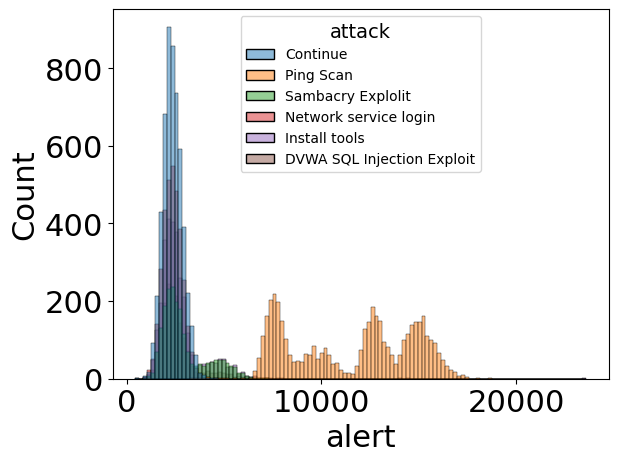

In [360]:
print(df[df["attack"]=="DVWA SQL Injection Exploit"]["alert"].max)
ax = sns.histplot(data=df,x="alert",hue="attack")
sns.move_legend(ax, "upper center", title_fontsize=14,fontsize=10)
plt.savefig("Hist-density.pdf",bbox_inches="tight")

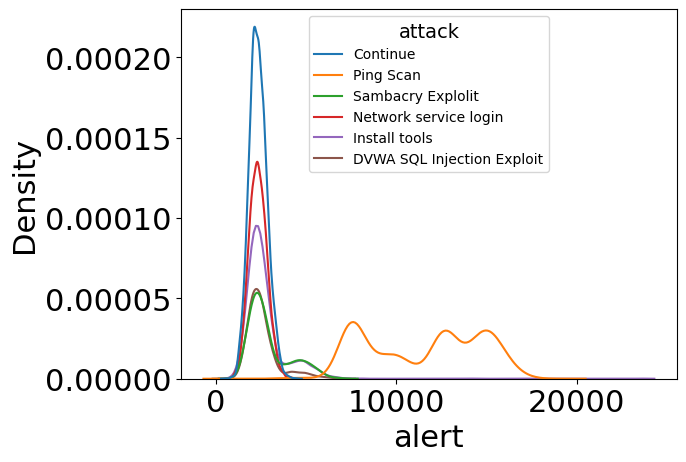

In [362]:

ax = sns.kdeplot(data=df,x="alert",hue="attack")
sns.move_legend(ax, "upper center", title_fontsize=14,fontsize=10)

plt.savefig("all.pdf",bbox_inches="tight")

     382
0   2229
1   7130
2   1892
3   2236
4   4404
5  15658
6   3458
7   3103
8   2360
9  15810


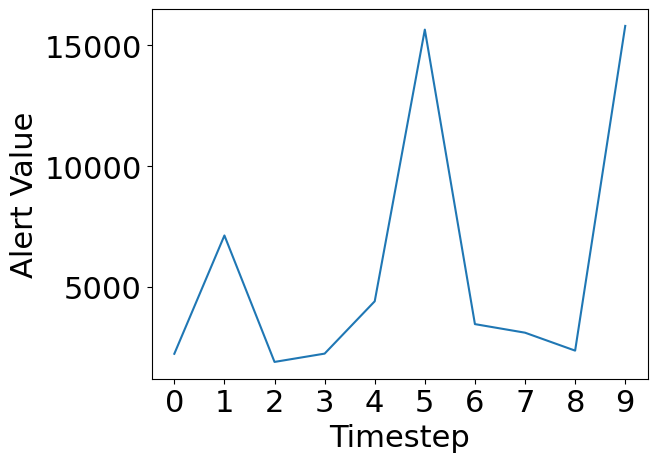

In [363]:
random_row = X.sample(n=1)
row_at_index = Y.iloc[random_row.index]
row_at_index = row_at_index.transpose()
print(row_at_index)

plt.plot(row_at_index)
plt.xlabel("Timestep")
plt.ylabel("Alert Value")
plt.savefig("Sample.pdf",bbox_inches="tight")

In [349]:
print(X.iloc[random_row.index])

            0          1                  2                      3  \
664  Continue  Ping Scan  Sambacry Explolit  Network service login   

                 4          5                           6  \
664  Install tools  Ping Scan  DVWA SQL Injection Exploit   

                         7              8          9  
664  Network service login  Install tools  Ping Scan  


In [243]:
X = oX.copy()
Y = oY.copy()

In [364]:
attack_names_map = {"Continue":0,"Ping Scan":1,"Install tools":2,"DVWA SQL Injection Exploit":3,"Network service login":4,"Sambacry Explolit":5}
X = X.replace(attack_names_map)
print(X)

      0  1  2  3  4  5  6  7  8  9
0     0  1  5  4  2  1  3  4  2  1
1     0  0  0  1  5  4  2  1  3  4
2     0  0  1  5  4  2  1  3  4  2
3     0  0  0  0  0  0  0  0  1  5
4     0  1  5  4  2  1  3  4  2  1
...  .. .. .. .. .. .. .. .. .. ..
1995  0  1  5  4  2  1  3  4  2  1
1996  0  0  0  1  5  4  2  1  3  4
1997  0  0  0  1  5  4  2  1  3  4
1998  0  0  1  5  4  2  1  3  4  2
1999  0  0  1  5  4  2  1  3  4  2

[2000 rows x 10 columns]


In [365]:
unique = list(unique_values)
unique.sort()
observation_symbols = list(range(len(unique)))
count = 0

    
print(unique)

[429, 560, 845, 860, 864, 865, 870, 880, 917, 928, 934, 938, 945, 959, 971, 990, 1009, 1018, 1022, 1030, 1034, 1044, 1048, 1058, 1061, 1064, 1066, 1070, 1075, 1076, 1079, 1080, 1096, 1104, 1111, 1113, 1115, 1120, 1124, 1125, 1126, 1128, 1133, 1134, 1135, 1141, 1143, 1150, 1152, 1163, 1164, 1169, 1172, 1182, 1184, 1186, 1188, 1191, 1192, 1193, 1194, 1199, 1201, 1209, 1212, 1214, 1215, 1218, 1219, 1220, 1221, 1223, 1225, 1226, 1227, 1228, 1229, 1231, 1232, 1234, 1236, 1242, 1244, 1246, 1248, 1249, 1251, 1252, 1255, 1256, 1258, 1259, 1262, 1263, 1269, 1270, 1271, 1275, 1277, 1278, 1279, 1280, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1294, 1300, 1301, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1311, 1313, 1317, 1318, 1324, 1325, 1327, 1329, 1330, 1333, 1334, 1336, 1337, 1338, 1340, 1341, 1343, 1344, 1345, 1347, 1348, 1349, 1350, 1351, 1352, 1354, 1355, 1357, 1359, 1360, 1361, 1363, 1366, 1367, 1369, 1372, 1373, 1374, 1375, 1376, 1379, 1382, 1383, 1384, 1385, 1387, 1391, 1392, 1393, 1

/var/folders/y4/f6yg34qx1618kx4104r7r14r0000gn/T/ipykernel_44774/2956911354.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X)


<Axes: ylabel='Density'>

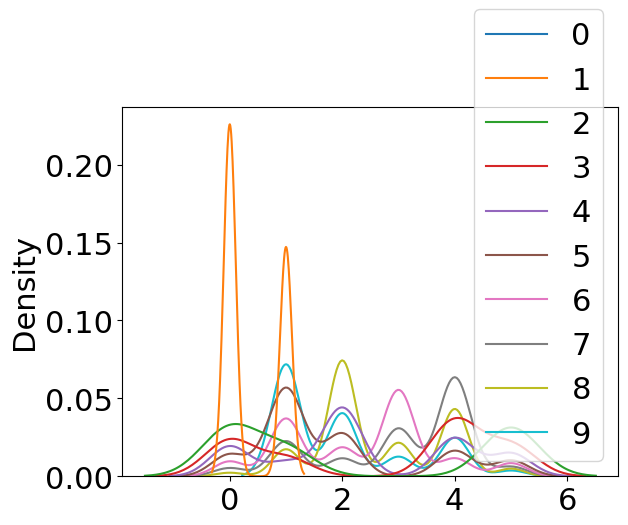

In [272]:
sns.kdeplot(X,x="alert",hue="alert")


In [274]:
df = pd.DataFrame(columns=['attack','alert',"timestep"])
count = 0
rows_list = []
for index, row in X.iterrows():
    
    for col, value in row.items():
        rows_list.append({"attack": value,"alert":Y.iloc[index][col],"timestep":col})
df = pd.DataFrame(rows_list)  

print(df)

       attack  alert timestep
0           0      0        0
1           1    511        1
2           5      0        2
3           4      0        3
4           2      0        4
...       ...    ...      ...
19995       4      0        5
19996       2      0        6
19997       1   1022        7
19998       3      0        8
19999       4      0        9

[20000 rows x 3 columns]


/var/folders/y4/f6yg34qx1618kx4104r7r14r0000gn/T/ipykernel_44774/3414094355.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(net,x="alert")


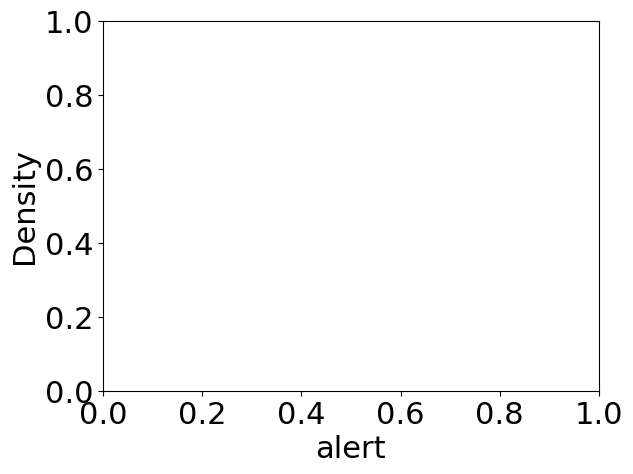

In [306]:
sns.kdeplot(net,x="alert")
plt.savefig("Net.pdf")